In [42]:
import pandas as pd
from data_cleaning import add_ranks, clean_results_df
from web_scrape_results import scrape_results

In [43]:
# Create an empty dataframe to store the final results
final_df = pd.DataFrame(
    columns=[
        "Pl",
        "Pos",
        "Athlete",
        "Time",
        "one_lap_to_go",
        "final_place",
        "Rank Change",
        "Event",
        "Gender",
    ]
)

In [44]:
urls = [
    "https://flashresults.ncaa.com/Outdoor/2025/007-1-01.htm",
    "https://flashresults.ncaa.com/Outdoor/2025/006-2-01.htm",
    "https://flashresults.ncaa.com/Outdoor/2025/008-1-01.htm",
    "https://flashresults.ncaa.com/Outdoor/2025/005-2-01.htm",
    "https://flashresults.ncaa.com/Outdoor/2025/004-2-01.htm",
    "https://flashresults.ncaa.com/Outdoor/2025/027-1-01.htm",
    "https://flashresults.ncaa.com/Outdoor/2025/026-2-01.htm",
    "https://flashresults.ncaa.com/Outdoor/2025/028-1-01.htm",
    "https://flashresults.ncaa.com/Outdoor/2025/025-2-01.htm",
    "https://flashresults.ncaa.com/Outdoor/2025/024-2-01.htm",
]
genders = [
    "Men",
    "Men",
    "Men",
    "Men",
    "Men",
    "Women",
    "Women",
    "Women",
    "Women",
    "Women",
]
events = ["5k", "3k", "10k", "1500m", "800m", "5k", "3k", "10k", "1500m", "800m"]
# Loop through the 4 race results
for url, gender, event in zip(urls, genders, events):
    print(gender, event)
    # Scrape results from internet
    df = scrape_results(url)
    # Do some data cleaning
    clean_df = clean_results_df(df)
    # Add ranks per lap
    rank_df = add_ranks(clean_df)
    # Last lap df
    last_lap_df = rank_df.iloc[:, list(range(4)) + list(range(-2, 0))]
    last_lap_df = last_lap_df.rename(
        columns={
            last_lap_df.columns[-2]: "one_lap_to_go",
            last_lap_df.columns[-1]: "final_place",
        }
    )
    # Add rank change
    last_lap_df["Rank Change"] = (
        last_lap_df["one_lap_to_go"] - last_lap_df["final_place"]
    )
    # Add column for event and gender
    last_lap_df["Event"] = event
    last_lap_df["Gender"] = gender
    # Union the dataframes
    final_df = pd.concat([final_df, last_lap_df], ignore_index=True)


Men 5k
Men 3k
Men 10k
Men 1500m
Men 800m
Women 5k
Women 3k
Women 10k
Women 1500m
Women 800m


In [45]:
final_df

,Pl,Pos,Athlete,Time,one_lap_to_go,final_place,Rank Change,Event,Gender
0,1,20,Brian Musa,13:20.59,1,1,0,5k,Men
1,2,15,Habtom Samue,13:20.89,2,2,0,5k,Men
2,3,17,Marco Lango,13:21.17,4,3,1,5k,Men
3,4,13,Valentin Soc,13:21.76,6,4,2,5k,Men
4,5,18,Rocky Hanse,13:22.47,5,5,0,5k,Men
...,...,...,...,...,...,...,...,...,...
157,5,7,Lauren Tolber,1:59.88,3,5,-2,800m,Women
158,6,2,Smilla Kolb,2:00.37,7,6,1,800m,Women
159,7,9,Laura Pellicor,2:00.84,9,7,2,800m,Women
160,8,8,Veronica Hargrav,2:01.00,8,8,0,800m,Women


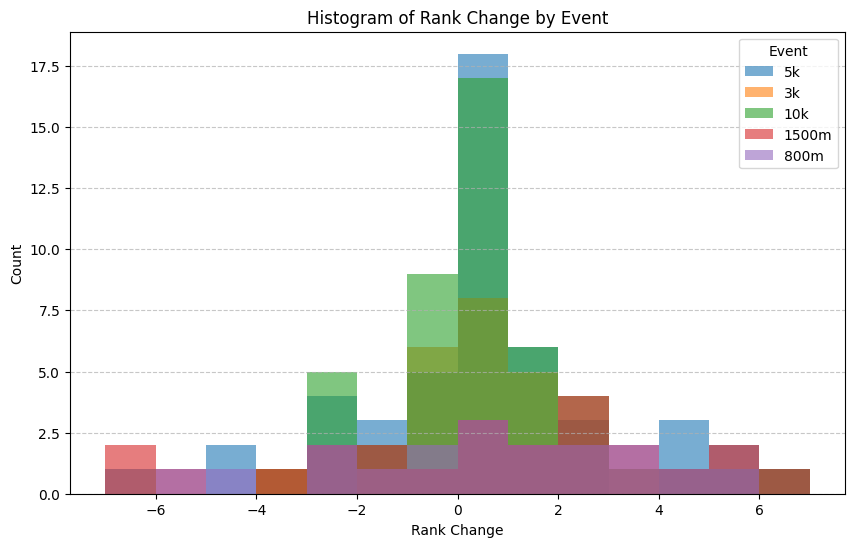

In [46]:
import matplotlib.pyplot as plt

# Convert 'Rank Change' to numeric if not already
final_df["Rank Change"] = pd.to_numeric(final_df["Rank Change"], errors="coerce")

plt.figure(figsize=(10, 6))
for event in final_df["Event"].unique():
    subset = final_df[final_df["Event"] == event]
    plt.hist(
        subset["Rank Change"],
        bins=range(
            int(final_df["Rank Change"].min()), int(final_df["Rank Change"].max()) + 2
        ),
        alpha=0.6,
        label=event,
    )

plt.xlabel("Rank Change")
plt.ylabel("Count")
plt.title("Histogram of Rank Change by Event")
plt.legend(title="Event")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

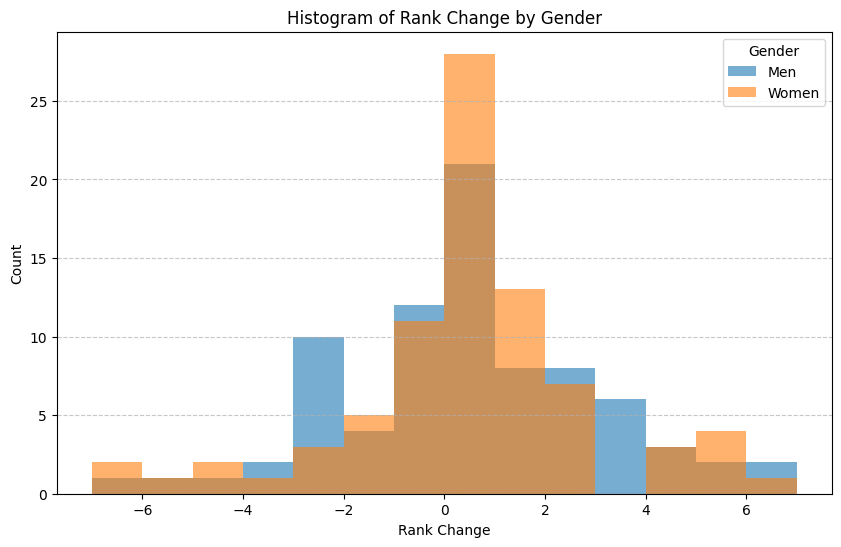

In [47]:
# Convert 'Rank Change' to numeric if not already
final_df["Rank Change"] = pd.to_numeric(final_df["Rank Change"], errors="coerce")

plt.figure(figsize=(10, 6))
for gender in final_df["Gender"].unique():
    subset = final_df[final_df["Gender"] == gender]
    plt.hist(
        subset["Rank Change"],
        bins=range(
            int(final_df["Rank Change"].min()), int(final_df["Rank Change"].max()) + 2
        ),
        alpha=0.6,
        label=gender,
    )

plt.xlabel("Rank Change")
plt.ylabel("Count")
plt.title("Histogram of Rank Change by Gender")
plt.legend(title="Gender")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [48]:
event_gender_counts = (
    final_df.groupby(["Event", "Gender"]).size().reset_index(name="Count")
)
print(event_gender_counts)

   Event Gender  Count
0    10k    Men     24
1    10k  Women     24
2  1500m    Men     12
3  1500m  Women     12
4     3k    Men     12
5     3k  Women     12
6     5k    Men     24
7     5k  Women     24
8   800m    Men      9
9   800m  Women      9
